## Instalando paquetes necesarios

In [1]:
#%pip install kaggle
#%pip install opendatasets


## Importando los paquetes necesarios

In [4]:
#import opendatasets as od # no para python 3.13
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

from os import listdir
import shutil
import numpy as np
import keras.preprocessing.image as kerasImg
import keras.layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import ops



c:\Users\lgarc\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\lgarc\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\lgarc\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framewo

## Descargando el conjunto de datos
Usaremos las instrucciones del siguiente link(https://www.geeksforgeeks.org/how-to-download-kaggle-datasets-into-jupyter-notebook/) para descargar los datos directamente de kaggle, tenga en cuenta que son 800 MB por lo que puede demorarse en descargar. 

In [4]:
if not (os.path.isdir('dogs-vs-cats')):
    od.download( "https://www.kaggle.com/c/dogs-vs-cats/data") 
else:
    with zipfile.ZipFile('dogs-vs-cats/train.zip', 'r') as zip_ref:
        zip_ref.extractall('../Scripts/dogs-vs-cats')
    with zipfile.ZipFile('dogs-vs-cats/test1.zip', 'r') as zip_ref:
        zip_ref.extractall('../Scripts/dogs-vs-cats')


## Explorando el conjunto de datos
Visualicemos algunas de las imágenes que tiene nuestro conjunto de datos de entrenamiento. Se mostrarán las primeras 9 imágenes de perros 9 de gatos:

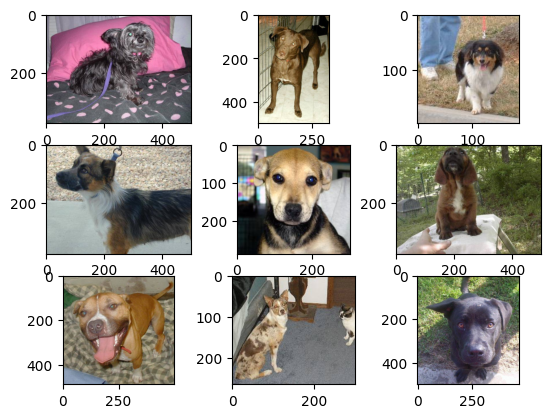

In [6]:
folder = "../Scripts/dogs-vs-cats/train/"
# Dogs
for i in range(9):
    plt.subplot(330+1+i)
    filename = folder+'dog.'+str(i)+'.jpg'
    image = imread(filename)
    plt.imshow(image)

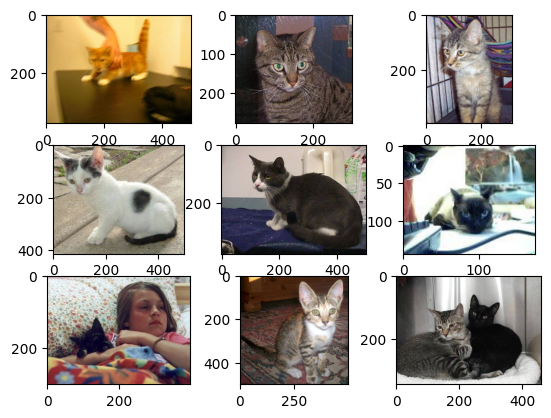

In [7]:
# Cats
for i in range(9):
    plt.subplot(330+1+i)
    filename = folder+'cat.'+str(i)+'.jpg'
    image = imread(filename)
    plt.imshow(image)

Como se puede ver tienen diferentes resoluciones. Algunas están verticales y otras horizontales. Podemos normalizar las imágenes poniendolas todas de la misma resolución. 
Hay dos formas de hacerlo, o se cargan todas en memoria lo que significaría 12 gb de ram ocupados o se cargan por lotes, hagamos las dos formas.

Vamos a crear una carpeta para los gatos y otra para los perros tanto para train como para test

In [8]:
folder = "../Scripts/dogs-vs-cats/"
subdirs = ['train/', 'test/']
labeldirs = ['cats/', 'dogs/']

In [9]:
for subdir in subdirs:
 # create label subdirectories
    for labldir in labeldirs:
        newdir = folder + subdir + labldir
        os.makedirs(newdir, exist_ok=True)

random.seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
src_directory = folder+'train/'
for file in os.listdir(src_directory):
    print(file)
    if random.random() < val_ratio:
        dst_dir = folder+'test/'
    else:
        dst_dir = folder+'train/'
    if file.startswith('cat'):
        dst_dir = dst_dir+'cats/'
        dst = dst_dir + file
    elif file.startswith('dog'):
        dst_dir = dst_dir+'dogs/'
        dst = dst_dir  + file
    try:
        shutil.copy2(src_directory+file, dst)
    except PermissionError as e:
        print(f"Error de permisos al copiar {file}: {e}")
    except Exception as e:
        print(f"Ocurrió un error al copiar {file}: {e}")

cat.0.jpg
cat.1.jpg
cat.10.jpg
cat.100.jpg
cat.1000.jpg
cat.10000.jpg
cat.10001.jpg
cat.10002.jpg
cat.10003.jpg
cat.10004.jpg
cat.10005.jpg
cat.10006.jpg
cat.10007.jpg
cat.10008.jpg
cat.10009.jpg
cat.1001.jpg
cat.10010.jpg
cat.10011.jpg
cat.10012.jpg
cat.10013.jpg
cat.10014.jpg
cat.10015.jpg
cat.10016.jpg
cat.10017.jpg
cat.10018.jpg
cat.10019.jpg
cat.1002.jpg
cat.10020.jpg
cat.10021.jpg
cat.10022.jpg
cat.10023.jpg
cat.10024.jpg
cat.10025.jpg
cat.10026.jpg
cat.10027.jpg
cat.10028.jpg
cat.10029.jpg
cat.1003.jpg
cat.10030.jpg
cat.10031.jpg
cat.10032.jpg
cat.10033.jpg
cat.10034.jpg
cat.10035.jpg
cat.10036.jpg
cat.10037.jpg
cat.10038.jpg
cat.10039.jpg
cat.1004.jpg
cat.10040.jpg
cat.10041.jpg
cat.10042.jpg
cat.10043.jpg
cat.10044.jpg
cat.10045.jpg
cat.10046.jpg
cat.10047.jpg
cat.10048.jpg
cat.10049.jpg
cat.1005.jpg
cat.10050.jpg
cat.10051.jpg
cat.10052.jpg
cat.10053.jpg
cat.10054.jpg
cat.10055.jpg
cat.10056.jpg
cat.10057.jpg
cat.10058.jpg
cat.10059.jpg
cat.1006.jpg
cat.10060.jpg
cat.10061.jp

### Cargar todas en memoria

In [10]:
fotos_train = []
fotos_test = []
etiquetas_train = []
etiquetas_test = []

#Train
for dir in labeldirs:
    for file in os.listdir(folder+subdirs[0]+dir):
        etiqueta = 0 #es un gato
        if file.startswith('dog'):
            etiqueta = 1 #es un perro
        imagen = kerasImg.load_img(folder+subdirs[0]+dir+file,target_size=(200,200))
        imagen = kerasImg.img_to_array(imagen)
        #convertir a arreglos de numpy
        fotos_train.append(imagen)
        etiquetas_train.append(etiqueta)
fotos_train = np.asarray(fotos_train)
etiquetas_train = np.asarray(etiquetas_train)
print(fotos_train.shape, etiquetas_train.shape)



(18698, 200, 200, 3) (18698,)


Se pueden guardar las imágenes y son fáciles de cargar luego

In [19]:
np.save(folder+'dogs_vs_cats_photos.npy',fotos_train)
np.save(folder+'dogs_vs_cats_labels.npy',etiquetas_train)

Se pueden cargar usando las siguientes instrucciones

In [ ]:
fotos_train = np.load(folder+'dogs_vs_cats_photos.npy')
etiquetas_trainlabels = np.load(folder+'dogs_vs_cats_labels.npy')
print(fotos_train.shape, etiquetas_train.shape)

Para cargar todas las imágenes en memoria es necesario tener al menos 12 gb de RAM disponible. Si no se cuenta con esa cantidad de RAM siempre se pueden cargar por lotes de la siguiente forma.
## Carga de imágenes por lotes

Para esto se puede usar la clase de [Keras ImageDataGenerator](https://keras.io/api/data_loading/image/) y la función flow_from_directory() 
Pero esta clase necesita que tener una carpeta por cada una de las categorías a clasificar, esto ya se hizo. Tenemos la siguiente estructura:
 
dogs_vs_cats  
├── test  
│&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├── cats  
│&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;└── dogs  
└── train  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├── cats  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;└── dogs

Ahora exploremos un poco el conjunto de datos

## Análisis Exploratorio
Veamos si el conjunto de datos está balanceado

In [39]:
# etiquetas_df = pd.DataFrame(etiquetas_train)
# etiquetas_df.value_counts()

Como se puede ver el dataset está balanceado, ya vimos que las imágenes no tienen la misma resolución pero haremos un modelo con las imágenes como están y lo analizaremos.

In [14]:
modelo1 = keras.Sequential()
modelo1.add(keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
modelo1.add(keras.layers.MaxPooling2D((2,2)))
modelo1.add(keras.layers.Flatten())
modelo1.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelo1.add(keras.layers.Dense(1, activation='sigmoid'))
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
modelo1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
modelo1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 320000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    40,960,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,961,153 (156.25 MB)

 Trainable params: 40,961,153 (156.25 MB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamos el modelo

In [15]:
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_it = datagen.flow_from_directory(folder+"train/", class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory(folder+"test/", class_mode='binary', batch_size=64, target_size=(200, 200))
history = modelo1.fit(train_it, steps_per_epoch=train_it.samples//train_it.batch_size,validation_data=test_it, validation_steps=test_it.samples//test_it.batch_size,epochs = 5,verbose = True )
#modelo1.save(folder+'modelo1.keras')

Found 18698 images belonging to 2 classes.
Found 6302 images belonging to 2 classes.


c:\Users\lgarc\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
292/292 ━━━━━━━━━━━━━━━━━━━━ 86s 292ms/step - accuracy: 0.6330 - loss: 0.7207 - val_accuracy: 0.6582 - val_loss: 0.6024
Epoch 2/5
  1/292 ━━━━━━━━━━━━━━━━━━━━ 53s 183ms/step - accuracy: 0.6406 - loss: 0.5417

c:\Users\lgarc\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


292/292 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.6406 - loss: 0.5417 - val_accuracy: 0.6561 - val_loss: 0.6023
Epoch 3/5
292/292 ━━━━━━━━━━━━━━━━━━━━ 76s 259ms/step - accuracy: 0.7156 - loss: 0.5473 - val_accuracy: 0.6980 - val_loss: 0.5665
Epoch 4/5
292/292 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7969 - loss: 0.5118 - val_accuracy: 0.6988 - val_loss: 0.5673
Epoch 5/5
292/292 ━━━━━━━━━━━━━━━━━━━━ 76s 259ms/step - accuracy: 0.7593 - loss: 0.4789 - val_accuracy: 0.7006 - val_loss: 0.5890


#### Validamos resultados

In [16]:
loss , acc = modelo1.evaluate(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.7004 - loss: 0.5888
> 70.041


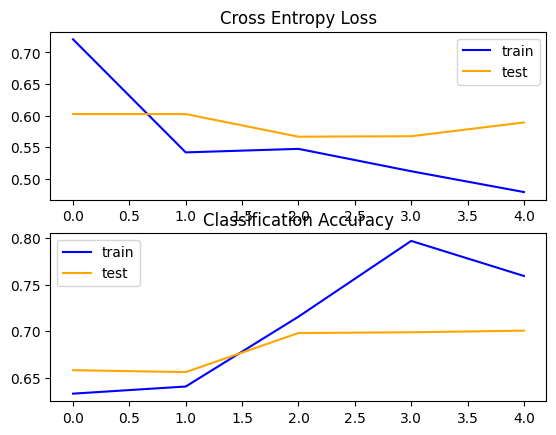

In [17]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend()
 # plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend()



Como se puede ver el modelo es bastante malo. El accuracy es de 64% y en cada época. En los gráficos se puede observar la pérdida y la exactitud de ambos conjuntos, de entrenamiento (azul) y prueba (test). En el gráfico de la pérdida, esta se mantiene casi constante para el conjunto de prueba, así que es posible que con más épocas no resuelva para nada el problema. En el caso de la exactitud sucede lo mismo parece ir en aumento a medida que transcurren las épocas pero parece ser un aumento bastante lento

### Arquitecturas
Usemos una arquitectura VGG de 2 bloques y veamos que sucede

In [18]:
modelo2 = keras.Sequential()
modelo2.add(keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(200,200,3)))
modelo2.add(keras.layers.MaxPooling2D((2,2)))
modelo2.add(keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
modelo2.add(keras.layers.MaxPooling2D((2,2)))
modelo2.add(keras.layers.Flatten())
modelo2.add(keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'))
modelo2.add(keras.layers.Dense(1,activation='sigmoid'))
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
modelo2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
modelo2.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    20,480,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,499,649 (78.20 MB)

 Trainable params: 20,499,649 (78.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history2 = modelo2.fit(train_it, steps_per_epoch=train_it.samples//train_it.batch_size,validation_data=test_it, validation_steps=test_it.samples//test_it.batch_size,epochs = 5,verbose = True )
#modelo2.save(folder+'modelo2.keras')

Epoch 1/5
292/292 ━━━━━━━━━━━━━━━━━━━━ 1048s 4s/step - accuracy: 0.6535 - loss: 0.6319 - val_accuracy: 0.7052 - val_loss: 0.5573
Epoch 2/5
292/292 ━━━━━━━━━━━━━━━━━━━━ 51s 169ms/step - accuracy: 0.6719 - loss: 0.5576 - val_accuracy: 0.7270 - val_loss: 0.5385
Epoch 3/5
125/292 ━━━━━━━━━━━━━━━━━━━━ 2:49 1s/step - accuracy: 0.7563 - loss: 0.5045  

In [46]:
loss , acc = modelo2.evaluate(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

99/99 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - accuracy: 0.7443 - loss: 0.5268
> 73.675


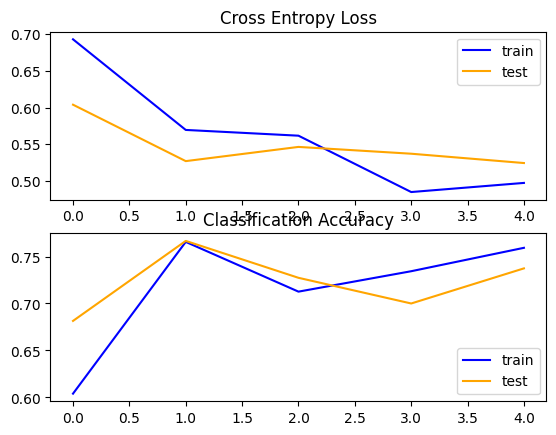

In [47]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history2.history['loss'], color='blue', label='train')
plt.plot(history2.history['val_loss'], color='orange', label='test')
plt.legend()
 # plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history2.history['accuracy'], color='blue', label='train')
plt.plot(history2.history['val_accuracy'], color='orange', label='test')
plt.legend()


Como podemos ver, mejoró notablemente la exactitud, un modelo más complejo hace que mejore el modelo.

### Dropout

In [48]:
modelo3 = keras.Sequential()
modelo3.add(keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(200,200,3)))
modelo3.add(keras.layers.MaxPooling2D((2,2)))
modelo3.add(keras.layers.Dropout(0.1))
modelo3.add(keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
modelo3.add(keras.layers.MaxPooling2D((2,2)))
modelo3.add(keras.layers.Dropout(0.1))
modelo3.add(keras.layers.Flatten())
modelo3.add(keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'))
modelo3.add(keras.layers.Dense(1,activation='sigmoid'))
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
modelo3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
modelo3.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    20,480,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,499,649 (78.20 MB)

 Trainable params: 20,499,649 (78.20 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
history3 = modelo3.fit(train_it, steps_per_epoch=train_it.samples//train_it.batch_size,validation_data=test_it, validation_steps=test_it.samples//test_it.batch_size,epochs = 10,verbose = True )
#modelo3.save(folder+'modelo3.keras')

Epoch 1/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 391s 1s/step - accuracy: 0.5156 - loss: 0.7733 - val_accuracy: 0.5901 - val_loss: 0.6742
Epoch 2/10
  1/292 ━━━━━━━━━━━━━━━━━━━━ 5:53 1s/step - accuracy: 0.6719 - loss: 0.6285

c:\Program Files\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6719 - loss: 0.6285 - val_accuracy: 0.6333 - val_loss: 0.6386
Epoch 3/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 390s 1s/step - accuracy: 0.6010 - loss: 0.6620 - val_accuracy: 0.6264 - val_loss: 0.6531
Epoch 4/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.6250 - loss: 0.6467 - val_accuracy: 0.6667 - val_loss: 0.6058
Epoch 5/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 388s 1s/step - accuracy: 0.6407 - loss: 0.6299 - val_accuracy: 0.6071 - val_loss: 0.6511
Epoch 6/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.6094 - loss: 0.6533 - val_accuracy: 0.5667 - val_loss: 0.6526
Epoch 7/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 387s 1s/step - accuracy: 0.6431 - loss: 0.6185 - val_accuracy: 0.6526 - val_loss: 0.6160
Epoch 8/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.6719 - loss: 0.5839 - val_accuracy: 0.6333 - val_loss: 0.6153
Epoch 9/10
292/292 ━━━━━━━━━━━━━━━━━━━━ 401s 1s/step - accuracy: 0.6809 - loss: 0.5911 - val_accuracy: 0.6

In [115]:
loss , acc = modelo3.evaluate(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

99/99 ━━━━━━━━━━━━━━━━━━━━ 39s 387ms/step - accuracy: 0.6740 - loss: 0.6048
> 67.074


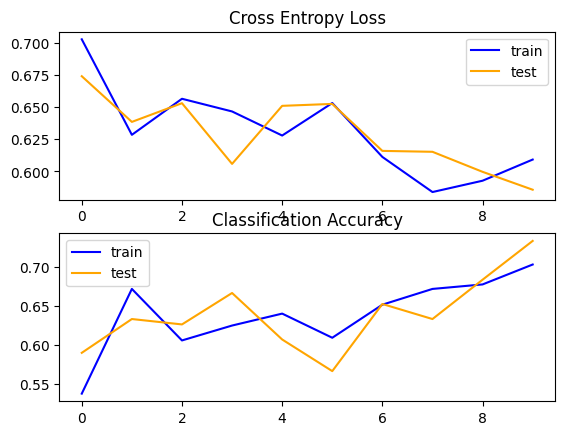

In [116]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history3.history['loss'], color='blue', label='train')
plt.plot(history3.history['val_loss'], color='orange', label='test')
plt.legend()
 # plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history3.history['accuracy'], color='blue', label='train')
plt.plot(history3.history['val_accuracy'], color='orange', label='test')
plt.legend()


### Image Data Augmentation
Para esto se necesitan dos ImageDataGenerator uno para el train y otro para el test

In [117]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_it = train_datagen.flow_from_directory(folder+"train/", class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = test_datagen.flow_from_directory(folder+"test/", class_mode='binary', batch_size=64, target_size=(200, 200))


Found 18698 images belonging to 2 classes.
Found 6302 images belonging to 2 classes.


In [49]:
modelo4 = keras.Sequential()
modelo4.add(keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(200,200,3)))
modelo4.add(keras.layers.MaxPooling2D((2,2)))
#modelo4.add(keras.layers.Dropout(0.2))
modelo4.add(keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
modelo4.add(keras.layers.MaxPooling2D((2,2)))
#modelo4.add(keras.layers.Dropout(0.2))
modelo4.add(keras.layers.Flatten())
modelo4.add(keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'))
modelo4.add(keras.layers.Dense(1,activation='sigmoid'))
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
modelo4.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
modelo4.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    20,480,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,499,649 (78.20 MB)

 Trainable params: 20,499,649 (78.20 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
history4 = modelo4.fit(train_it, steps_per_epoch=train_it.samples//train_it.batch_size,validation_data=test_it, validation_steps=test_it.samples//test_it.batch_size,epochs = 3,verbose = True )
#modelo4.save(folder+'modelo4.keras')

Epoch 1/3
292/292 ━━━━━━━━━━━━━━━━━━━━ 409s 1s/step - accuracy: 0.5623 - loss: 0.7003 - val_accuracy: 0.6138 - val_loss: 0.6445
Epoch 2/3
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - accuracy: 0.6719 - loss: 0.6083 - val_accuracy: 0.5667 - val_loss: 0.6857
Epoch 3/3
292/292 ━━━━━━━━━━━━━━━━━━━━ 414s 1s/step - accuracy: 0.6477 - loss: 0.6245 - val_accuracy: 0.6717 - val_loss: 0.6021


In [59]:
loss , acc = modelo4.evaluate(test_it, steps=len(test_it), verbose=1)
print('> %.3f' % (acc * 100.0))

99/99 ━━━━━━━━━━━━━━━━━━━━ 36s 368ms/step - accuracy: 0.6684 - loss: 0.6037
> 67.185


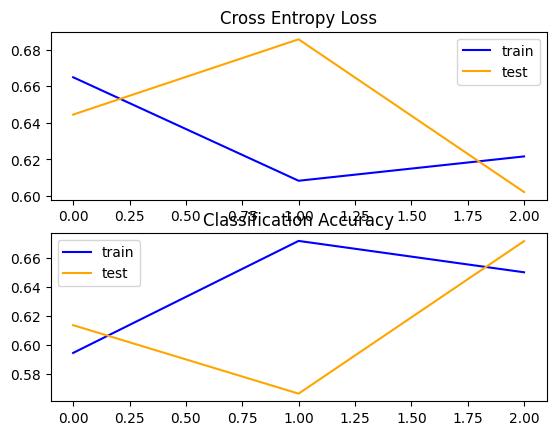

In [60]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history4.history['loss'], color='blue', label='train')
plt.plot(history4.history['val_loss'], color='orange', label='test')
plt.legend()
 # plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history4.history['accuracy'], color='blue', label='train')
plt.plot(history4.history['val_accuracy'], color='orange', label='test')
plt.legend()


## Predicción
Usaremos una imagen del conjunto de entrenamiento que se nos proporcionó para determinar si es un gato o un perro. Probemos el mejor modelo que obtuvimos. El modelo 2.


In [ ]:
#modelo2 = keras.models.load_model('../Scripts/dogs-vs-cats/modelo2.keras')

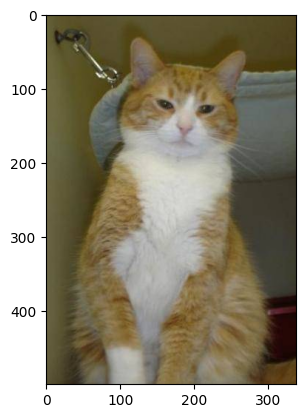

In [63]:
name = "../Scripts/dogs-vs-cats/test1/290.jpg"
foto = imread(name)
plt.imshow(foto)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Es un gato
0.0


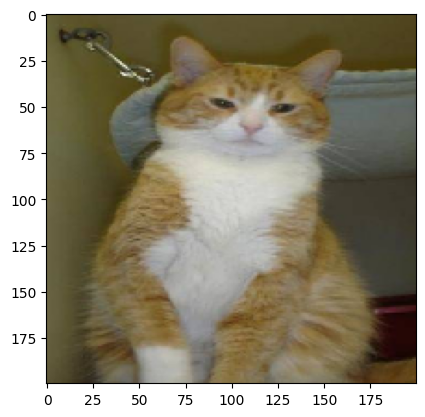

In [64]:
#resultado = run_example(name,modelo2)

imagen = kerasImg.load_img(name,target_size=(200,200))
plt.imshow(imagen)
imagen = kerasImg.img_to_array(imagen)
imagen = imagen.reshape(1,200,200,3)
resultado = modelo2.predict(imagen)
if round(resultado[0][0]) == 0:
    print ("Es un gato")
if round(resultado[0][0]) == 1:
    print ("Es un perro")
print(resultado[0][0])


## Referencias
- https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/